### Use the 06_iris.csv dataset for playing around with K-nearest neighbors. Find out the optimal value of k

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import metrics
from itertools import product

In [16]:
# Overview of the data set
iris = pd.read_csv("iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [17]:
# Determine the explanatory variables and the response variable
x = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [18]:
# Split the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=117)

In [31]:
# The number of neighbors: 1,3,5,7
klist = ['k=1','k=3','k=5','k=7']

# Initialize lists and dataframes for storing information
y_preds = pd.DataFrame(columns=klist)
accs = pd.DataFrame(columns=["Accuracy"])

ind = 0
for i in range(1,8,2):
    model = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_preds.iloc[:,ind] = y_pred
    acc = metrics.accuracy_score(y_test, y_pred)
    accs.loc[len(accs.index)] = acc
    
    ind += 1

accs.index = klist
display(accs)

,Accuracy
k=1,0.933333
k=3,0.955556
k=5,0.977778
k=7,0.933333


Based on the result table above, the accuracy of the model is the highest when k = 5. So 5 is the optimal choice of k among 1, 3, 5, 7 in this situation.

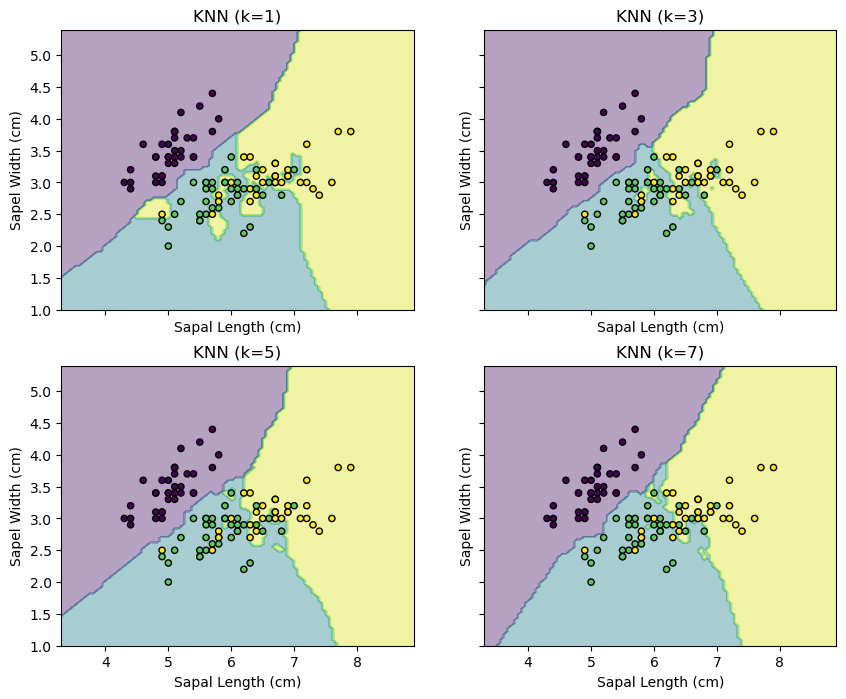

In [44]:
# Plotting Sapal decision regions
models=[]
ind = 0
x_train_sapal = x_train.iloc[:,:2]
x_test_sapal = x_test.iloc[:,:2]
for i in range(1,8,2):
    model = KNeighborsClassifier(n_neighbors=i).fit(x_train_sapal, y_train)
    models.append(model)
    y_pred = model.predict(x_test_sapal)
    y_preds.iloc[:,ind] = y_pred
    acc = metrics.accuracy_score(y_test, y_pred)
    accs.loc[len(accs.index)] = acc
    
    ind += 1

f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))

colors = np.linspace(0, 1, len(y_train))
colordict = dict(zip(y_train, colors))

for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    models,
    ["KNN (k=1)", "KNN (k=3)", "KNN (k=5)", "KNN (k=7)"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, x_train_sapal, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict",
        xlabel='Sapal Length (cm)', ylabel='Sapel Width (cm)'
    )
    axarr[idx[0], idx[1]].scatter(x_train_sapal.iloc[:,0], x_train_sapal.iloc[:,1], c=y_train.apply(lambda x: colordict[x]), s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

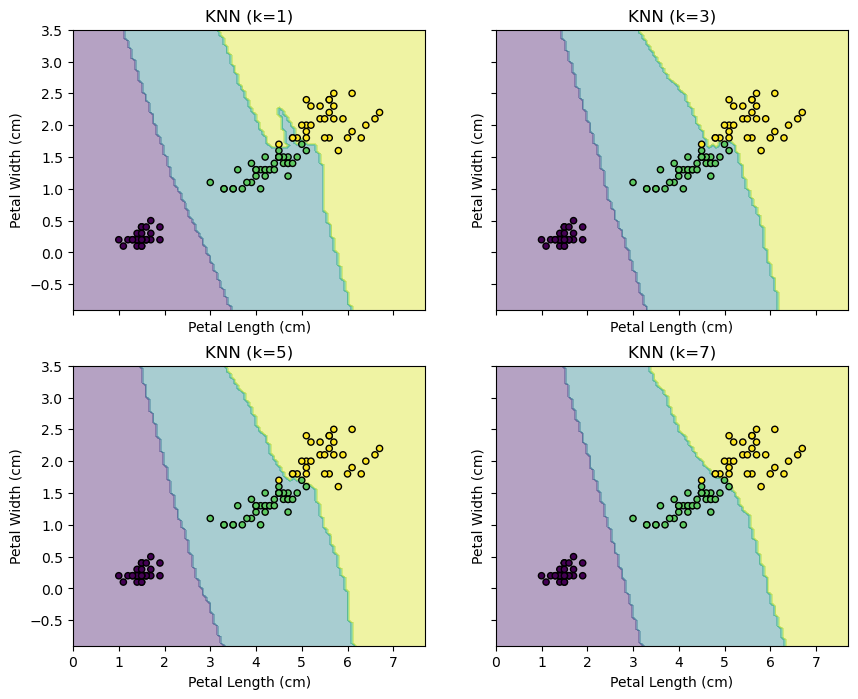

In [47]:
# Plotting Petal decision regions
models=[]
ind = 0
x_train_petal = x_train.iloc[:,2:]
x_test_petal = x_test.iloc[:,2:]
for i in range(1,8,2):
    model = KNeighborsClassifier(n_neighbors=i).fit(x_train_petal, y_train)
    models.append(model)
    y_pred = model.predict(x_test_petal)
    y_preds.iloc[:,ind] = y_pred
    acc = metrics.accuracy_score(y_test, y_pred)
    accs.loc[len(accs.index)] = acc
    
    ind += 1

f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))

for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    models,
    ["KNN (k=1)", "KNN (k=3)", "KNN (k=5)", "KNN (k=7)"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, x_train_petal, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict",
        xlabel='Petal Length (cm)', ylabel='Petal Width (cm)'
    )
    axarr[idx[0], idx[1]].scatter(x_train_petal.iloc[:,0], x_train_petal.iloc[:,1], c=y_train.apply(lambda x: colordict[x]), s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

Euclidean distance is utilized by the library I used to perform K-Nearest Neighbor.  
For four dimensions, which is the case we are facing:  
${\displaystyle d(p,q)={\sqrt {(p_{1}-q_{1})^{2}+(p_{2}-q_{2})^{2}+(p_{3}-q_{3})^{2}+(p_{4}-q_{4})^{2}}}.}$

We here use Euclidean distance because:  
1. Euclidean distance is simple to calculate and easy to use  
2. Euclidean distance is commonly used in many applications  
3. The features we used are all numeric and of the same unit and scale. In this case, the magnitude of the Euclidean distance of two points would be proportional to the difference of their feature values. So Euclidean distance is favored in this solving problem  